## Load the Data Frame

In [1]:
import pandas as pd





In [3]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20,parse_dates=["    DATE"])

In [6]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Load certain rows


In [5]:
df[10:21]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


## Show certain columns

In [8]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [9]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [10]:
df[['   TG','    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


## Simple statistics and filtering


In [16]:
df.loc[df['   TG'] != -9999 ]['   TG'].mean()/10

6.360787526128467

In [17]:
df.loc[df['   TG'] != -9999 ]['   TG'].max()/10

26.2

In [18]:
df.loc[df['   TG'] != -9999 ]['   TG'].min()/10

-28.8

<Axes: >

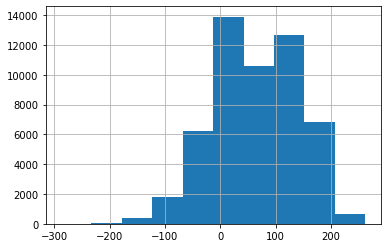

In [21]:
df.loc[df['   TG'] != -9999 ]['   TG'].hist()

In [22]:
df.loc[df['    DATE']=="1860-01-01"]['   TG'].squeeze()/10

2.1

## Calculate new columns from existing column

In [34]:
import numpy as np
df["TG0"]=df["   TG"].mask(df["   TG"]==-9999, np.nan)

In [35]:
df["TG"]= df["TG0"]/10

In [39]:
df["Fahrenheit"]= df["TG"]*(9/5) +32

In [40]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Farenheit,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,37.58,31.0
...,...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,-1767.82,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,-1767.82,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,-1767.82,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,-1767.82,NaN,NaN


## Plotting

<Axes: >

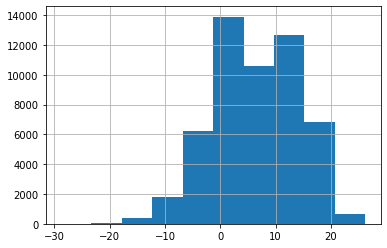

In [42]:
df['TG'].hist()

<Axes: xlabel='    DATE'>

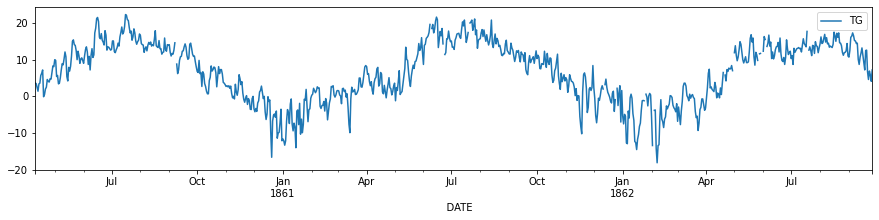

In [48]:
df[100:1000].plot(x='    DATE', y='TG', figsize=(15,3))